# CPSC 5530 Assignment 2
## Kyle Ford
## Due Date: 2/26/2023

# Dataset 1: Pokemon Dataset: 6D

In [2]:
#import libraries
import pandas as pd
from pandas.plotting import parallel_coordinates

#import dataset as dataframe
pokemon = pd.read_csv('Pokemon.csv', index_col = 0)

#display pokemon head
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
#check types of column objects
print(pokemon.dtypes)

Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


<AxesSubplot:>

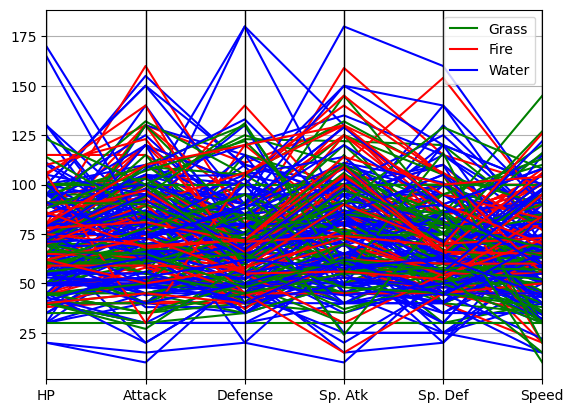

In [11]:
#begin plotting. Our 6 dimensions are HP, Attack, Defense, Sp. At, Sp. Def, Speed
p = (pokemon[(pokemon['Type 1'].isin(["Grass", "Fire", "Water"]))]
         .loc[:, ['Type 1', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
    )
parallel_coordinates(p, 'Type 1', color = ('green', 'red', 'blue'))
     

In [18]:
#above plot is cluttered. to better differentiate between lines, we take a sample of the original dataframe

#evaluate how many rows are in our dataframe
print("Number of total pokemon: ", len(pokemon['Name']))

#take a sample of the 800 and save to new dataframe
pokemon_sample = pokemon.sample(200)

#verify we have the correct number of rows in new dataframe
print("Number of pokemon sampled: ", len(pokemon_sample['Name']))

#print head of new dataframe
pokemon_sample.head()

Number of total pokemon:  800
Number of pokemon sampled:  200


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
654,Braixen,Fire,NaN,409,59,59,58,90,70,73,6,False
296,Makuhita,Fighting,NaN,237,72,60,30,20,30,25,3,False
597,Ferroseed,Grass,Steel,305,44,50,91,24,86,10,5,False
63,Abra,Psychic,NaN,310,25,20,15,105,55,90,1,False
421,Cherrim,Grass,NaN,450,70,60,70,87,78,85,4,False


<AxesSubplot:>

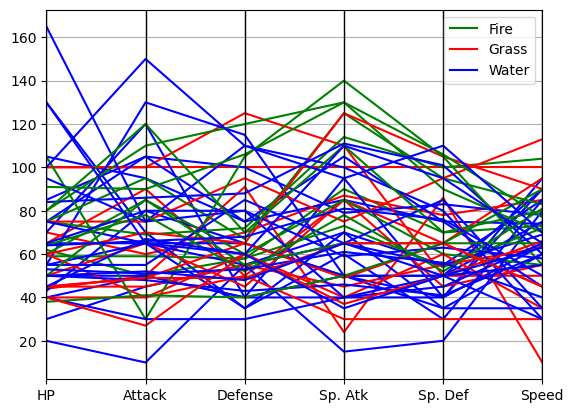

In [19]:
#redo our plot using the pokemon_sample dataframe
ps = (pokemon_sample[(pokemon_sample['Type 1'].isin(["Grass", "Fire", "Water"]))]
         .loc[:, ['Type 1', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
    )
parallel_coordinates(ps, 'Type 1', color = ('green', 'red', 'blue'))

# Dataset 2: Wine Data Set: 5D

In [73]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

#import both the tables for red and white wines. we create a new column every ";" 
red = pd.read_csv("winequality-red.csv", sep = ";")
white = pd.read_csv("winequality-white.csv", sep = ";")

#create column for which type of wine (red/white) it is
red['wine_type'] = 'red'
white['wine_type'] = 'white'

#create categorical quality labels "low", "medium", and "high" to describe each type of red/white wine
red['Quality Class'] = red['quality'].apply(lambda value: 'low'
                                           if value <= 5 else 'medium'
                                            if value <= 7 else 'high')
red['Quality Class'] = pd.Categorical(red['Quality Class'], categories = ["low", "medium", "high"])

white['Quality Class'] = white['quality'].apply(lambda value: 'low'
                                           if value <= 5 else 'medium'
                                            if value <= 7 else 'high')
white['Quality Class'] = pd.Categorical(white['Quality Class'], categories = ["low", "medium", "high"])

#merge dataframes via concatenation to create a single dataframe
wine = pd.concat([red, white])

#shuffle rows in dataframe to ensure merge was successful
wine = wine.sample(frac= 1, random_state=42).reset_index(drop = True)

#print head of merged dataframe
wine.head()
print(wine.dtypes)

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                    int64
wine_type                 object
Quality Class           category
dtype: object


Text(0.5, 0, 'Fixed Acidity')

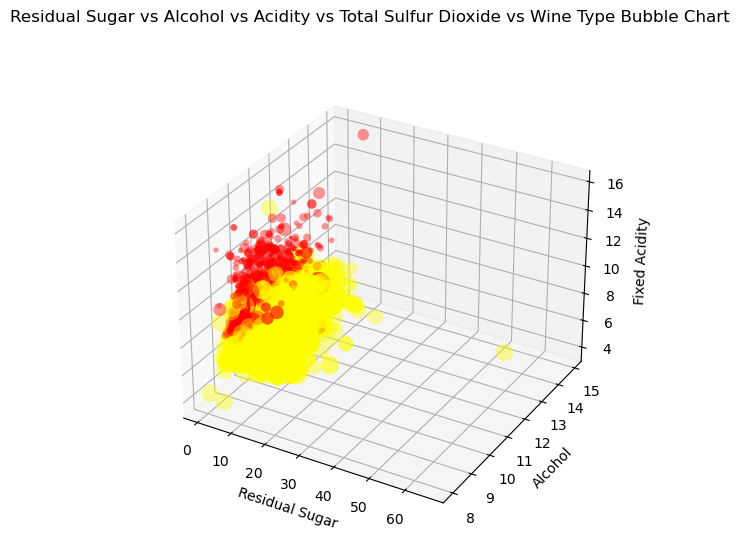

In [82]:
#now, we can begin plotting. We plot a 3D bubble chart to show color, residual sugar, alcohol, acidity, 
#total sulfur dioxide, and wine type

#set figure size and add 3rd axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

#add title
t = fig.suptitle('Residual Sugar vs Alcohol vs Acidity vs Total Sulfur Dioxide vs Wine Type Bubble Chart')

#define our x-, y-, and z- axes and the points that will go on each of them
xs = list(wine['residual sugar'])
ys = list(wine['alcohol'])
zs = list(wine['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

#set color preferences such that red wines are represented by red bubbles and white wines are represented by white bubbles
ss = list(wine['total sulfur dioxide'])
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wine['wine_type'])]

#plot the data
for data, color, size in zip(data_points, colors, ss):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size)

#Set x-, y-, and z- labels
ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

# Dataset 3: Diabetes Dataset: PCA 

In [83]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#import dataset as pandas datafram
diabetes = pd.read_csv("diabetes.csv")

#print head of dataframe
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [88]:
#drop outcome column
diabetes_no_outcome = diabetes.drop("Outcome", axis = 1)

#print new dataframe
diabetes_no_outcome.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [90]:
#create standard scaler object
scaler = StandardScaler()

#Fit the data using all of the features besides outcome
scaler.fit(diabetes_no_outcome)
scaled_data = scaler.transform(diabetes_no_outcome)

In [92]:
#create PCA object, specifying number of principal components to be 2
pca = PCA(n_components = 2)

#run the PCA on the scaled data
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

Text(0.5, 1.0, 'Scatter Plot of PC1 vs PC2')

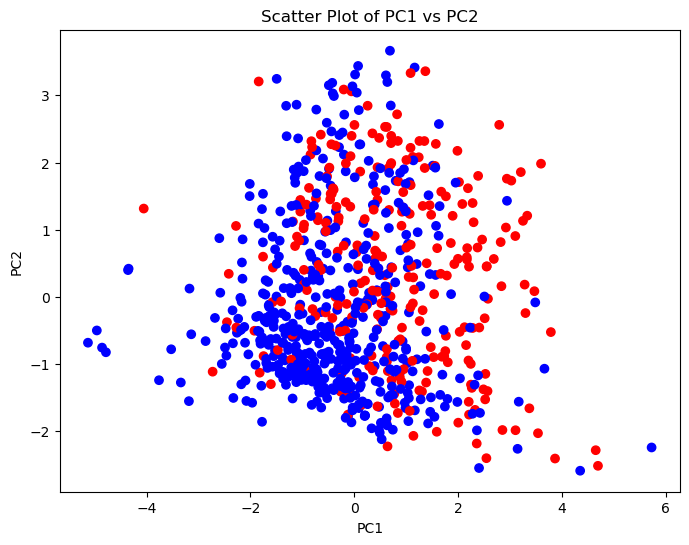

In [99]:
#plot PC1 vs PC2 as a scatter plot
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=diabetes['Outcome'], cmap = "bwr")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter Plot of PC1 vs PC2")

In [101]:
#reprint diabetes head
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Text(0.5, 1.0, 'Scatter Plot of Pregnancies vs Glucose')

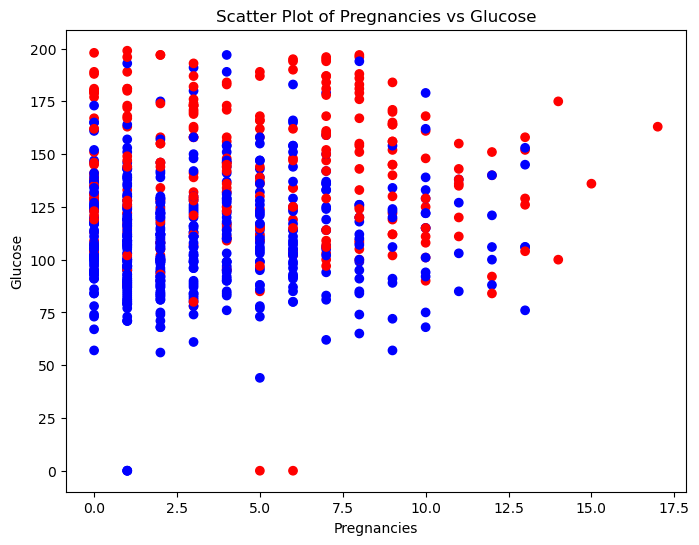

In [104]:
#scatterplot of Pregnancies vs Glucose
plt.figure(figsize=(8,6))
plt.scatter(diabetes['Pregnancies'], diabetes['Glucose'], c=diabetes['Outcome'], cmap = "bwr")
plt.xlabel("Pregnancies")
plt.ylabel("Glucose")
plt.title("Scatter Plot of Pregnancies vs Glucose")